# Generalized Auto-Regressive Conditional Heteroskedasticity (GARCH) stock volatility model

The GARCH model is used to model volatility in financial markets, which often exhibiting time varying volatility and have volatility clusters, i.e. periods of swings dispersed among periods of relative calm.

## Import of the relevant modules

In [65]:
import pandas_datareader as pdr
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import yfinance as yf

## Download and manipulation of the stock data

In [66]:
start_date = datetime(2015, 1, 1)
end_date = datetime(2022, 1, 1)
ticker_symbol = "GE"

In [67]:
ge = yf.download(ticker_symbol, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [68]:
ge.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,152.164780,152.885361,149.342468,150.483398,130.293335,6814541
2015-01-05,150.183151,150.183151,147.240738,147.721130,127.901680,6999789
2015-01-06,146.880447,147.540985,143.697830,144.538528,125.146080,10617953
2015-01-07,145.379211,146.460098,143.998077,144.598572,125.198082,7267786
2015-01-08,146.039749,146.400055,144.898819,146.339996,126.705872,7198159


In [69]:
returns = 100 * aapl.Close.pct_change().dropna()

In [70]:
returns.head()

Date
2015-01-05   -1.835597
2015-01-06   -2.154466
2015-01-07    0.041541
2015-01-08    1.204317
2015-01-09   -1.395156
Name: Close, dtype: float64

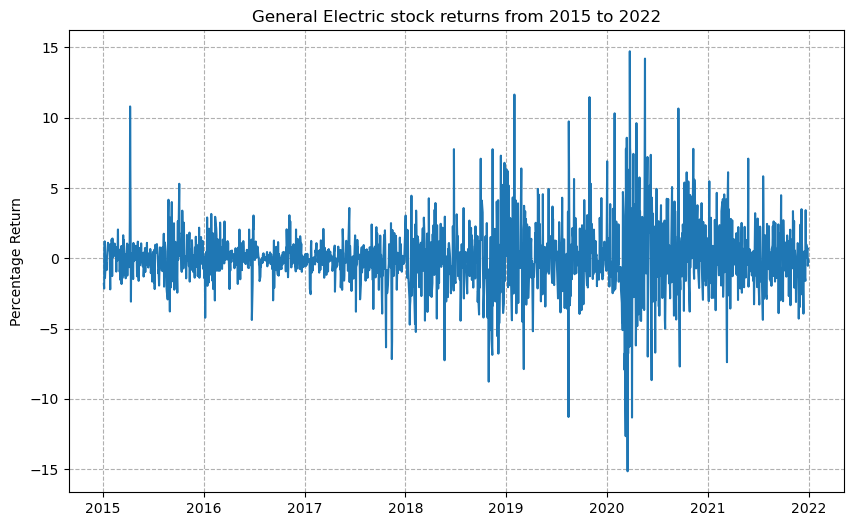

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(returns)
plt.title("General Electric stock returns from 2015 to 2022")
plt.ylabel("Percentage Return")
plt.grid(linestyle="--")
plt.show()

## PACF

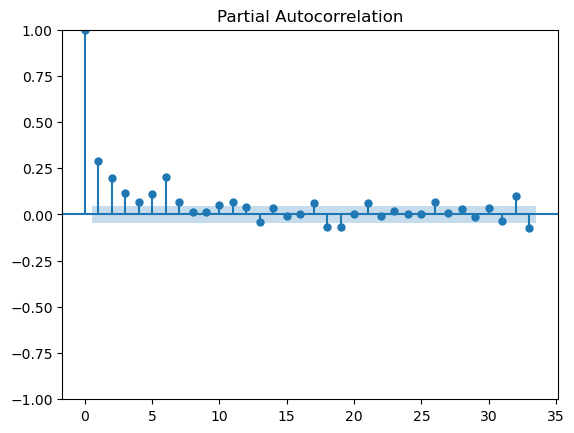

In [72]:
plot_pacf(returns**2, method='ywm')
plt.show()

## GARCH (3, 3) model

In [91]:
model = arch_model(returns, p=3, q=3)

In [92]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 5549.6852778425355
Iteration:      2,   Func. Count:     24,   Neg. LLF: 6119.384399714196
Iteration:      3,   Func. Count:     34,   Neg. LLF: 6797.604130357309
Iteration:      4,   Func. Count:     45,   Neg. LLF: 3658.039439323177
Iteration:      5,   Func. Count:     55,   Neg. LLF: 3637.155725493236
Iteration:      6,   Func. Count:     65,   Neg. LLF: 3614.703030912773
Iteration:      7,   Func. Count:     75,   Neg. LLF: 3595.7025973074797
Iteration:      8,   Func. Count:     84,   Neg. LLF: 3605.5331506751763
Iteration:      9,   Func. Count:     94,   Neg. LLF: 3895.708182285503
Iteration:     10,   Func. Count:    105,   Neg. LLF: 3595.1738952695487
Iteration:     11,   Func. Count:    115,   Neg. LLF: 3595.0696639870303
Iteration:     12,   Func. Count:    124,   Neg. LLF: 3599.1437430442584
Iteration:     13,   Func. Count:    135,   Neg. LLF: 3595.771344891499
Iteration:     14,   Func. Count:    145,   Neg. LLF: 3595

In [93]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3595.05
Distribution:                  Normal   AIC:                           7206.11
Method:            Maximum Likelihood   BIC:                           7249.90
                                        No. Observations:                 1762
Date:                Sun, Jul 30 2023   Df Residuals:                     1761
Time:                        21:41:20   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0491  3.647e-02     -1.346      0.178 [ -0.121,2.238e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1031  5.926e-02      1.741  8.177e-02   [-1.300e-02,  0.219]
alpha[1]       0.2370  7.278e-02      3.256  1.128e-03    [9.436e-02,  0.380]
alpha[2]   2.7865e-03  2.548e-02      0.109      0.913 [-4.716e-02,5.273e-02]
alpha[3]       0.0118  5.538e-02      0.214      0.831   [-9.670e-02,  0.120]
beta[1]        0.0845  4.544e-02      1.859  6.300e-02   [-4.580e-03,  0.174]
beta[2]        0.0000      0.161      0.000      1.000      [ -0.316,  0.316]
beta[3]        0.6639      0.121      5.488  4.055e-08      [  0.427,  0.901]
=============================================================================

Covariance estimator: robust
"""

## GARCH(1, 3) model

In [94]:
model = arch_model(returns, p=1, q=3)

In [95]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 8874.914614466583
Iteration:      2,   Func. Count:     19,   Neg. LLF: 5473.826748351788
Iteration:      3,   Func. Count:     27,   Neg. LLF: 3669.5140763585223
Iteration:      4,   Func. Count:     35,   Neg. LLF: 3677.69008935488
Iteration:      5,   Func. Count:     43,   Neg. LLF: 3616.827908922674
Iteration:      6,   Func. Count:     51,   Neg. LLF: 3610.307134187525
Iteration:      7,   Func. Count:     59,   Neg. LLF: 3618.6564437073785
Iteration:      8,   Func. Count:     67,   Neg. LLF: 3596.182905197089
Iteration:      9,   Func. Count:     74,   Neg. LLF: 3596.1687980546358
Iteration:     10,   Func. Count:     82,   Neg. LLF: 3595.521130431964
Iteration:     11,   Func. Count:     89,   Neg. LLF: 3595.5191084153116
Iteration:     12,   Func. Count:     96,   Neg. LLF: 3595.5190134557524
Iteration:     13,   Func. Count:    102,   Neg. LLF: 3595.5190128047066
Optimization terminated successfully    (Exit mode 0)
     

In [96]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3595.52
Distribution:                  Normal   AIC:                           7203.04
Method:            Maximum Likelihood   BIC:                           7235.88
                                        No. Observations:                 1762
Date:                Sun, Jul 30 2023   Df Residuals:                     1761
Time:                        21:41:22   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0492  3.718e-02     -1.324      0.186 [ -0.122,2.365e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0981  4.527e-02      2.167  3.023e-02 [9.375e-03,  0.187]
alpha[1]       0.2375  7.564e-02      3.140  1.689e-03 [8.927e-02,  0.386]
beta[1]        0.0934  4.763e-02      1.961  4.991e-02 [3.487e-05,  0.187]
beta[2]    1.1955e-11      0.118  1.017e-10      1.000   [ -0.230,  0.230]
beta[3]        0.6691      0.173      3.869  1.093e-04   [  0.330,  1.008]
==========================================================================

Covariance estimator: robust
"""

In [115]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=3)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1, reindex=True)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [116]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

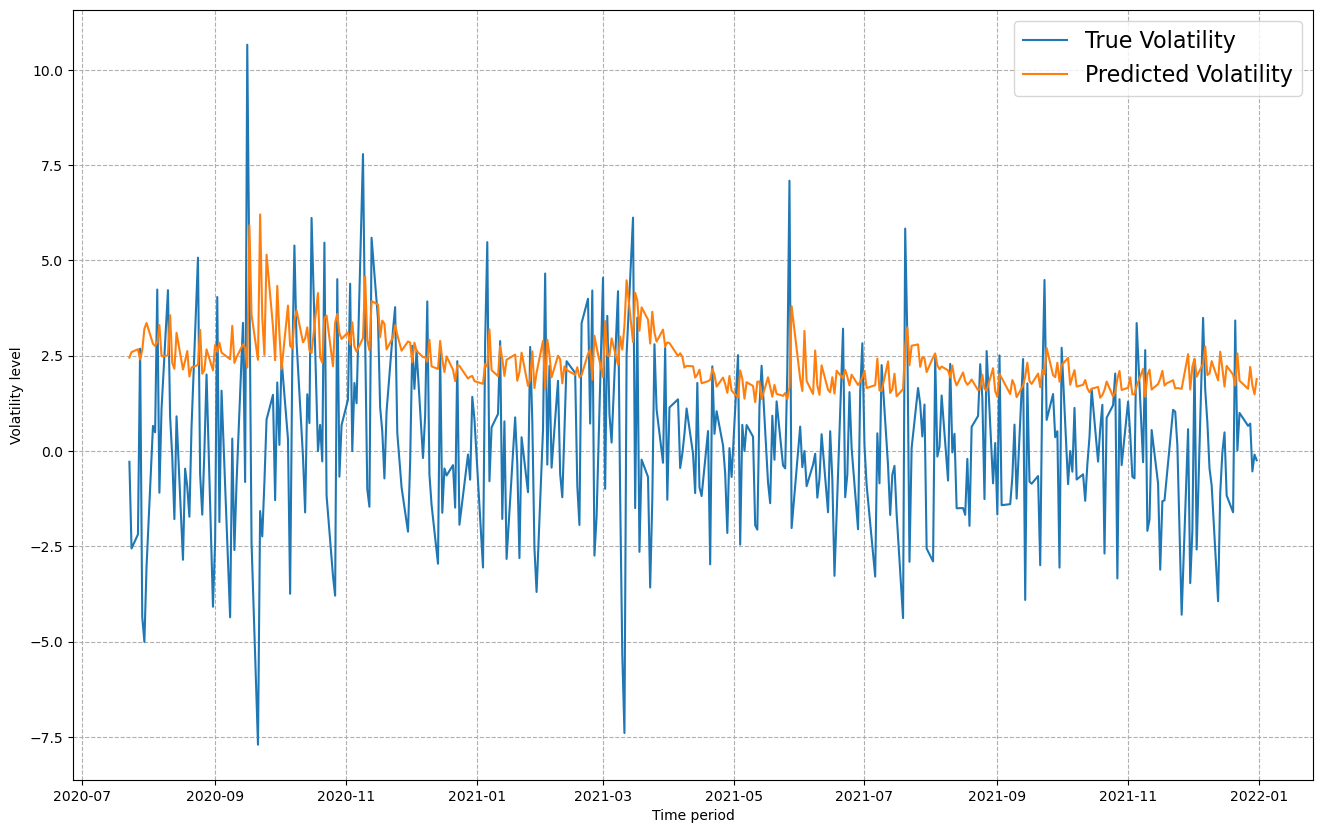

In [156]:
plt.figure(figsize=(16, 10))
true, = plt.plot(returns[-365:])
pred, = plt.plot(rolling_predictions)
plt.ylabel("Volatility level")
plt.xlabel("Time period")
plt.grid(linestyle="--")
plt.legend(["True Volatility", "Predicted Volatility"], fontsize=16)
plt.show()